In [97]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import optuna
from catboost import CatBoostClassifier
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [2]:
credit_record = pd.read_csv('/Users/maksimtrebusinin/Downloads/archive-3/credit_record.csv')
application_record = pd.read_csv('/Users/maksimtrebusinin/Downloads/archive-3/application_record.csv')

In [3]:
application_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
application_record.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [5]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
for col in application_record.select_dtypes('object').columns:
    print(f'{col} - {application_record[col].nunique()} unique values')

CODE_GENDER - 2 unique values
FLAG_OWN_CAR - 2 unique values
FLAG_OWN_REALTY - 2 unique values
NAME_INCOME_TYPE - 5 unique values
NAME_EDUCATION_TYPE - 5 unique values
NAME_FAMILY_STATUS - 5 unique values
NAME_HOUSING_TYPE - 6 unique values
OCCUPATION_TYPE - 18 unique values


In [7]:
application_record.OCCUPATION_TYPE.unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [8]:
application_record.groupby('OCCUPATION_TYPE').agg('count').iloc[:, 0]

OCCUPATION_TYPE
Accountants              15985
Cleaning staff            5845
Cooking staff             8076
Core staff               43007
Drivers                  26090
HR staff                   774
High skill tech staff    17289
IT staff                   604
Laborers                 78240
Low-skill Laborers        2140
Managers                 35487
Medicine staff           13520
Private service staff     3456
Realty agents             1041
Sales staff              41098
Secretaries               2044
Security staff            7993
Waiters/barmen staff      1665
Name: ID, dtype: int64

In [9]:
application_record.duplicated().sum()

0

In [10]:
application_record.drop('FLAG_MOBIL', axis=1, inplace=True)

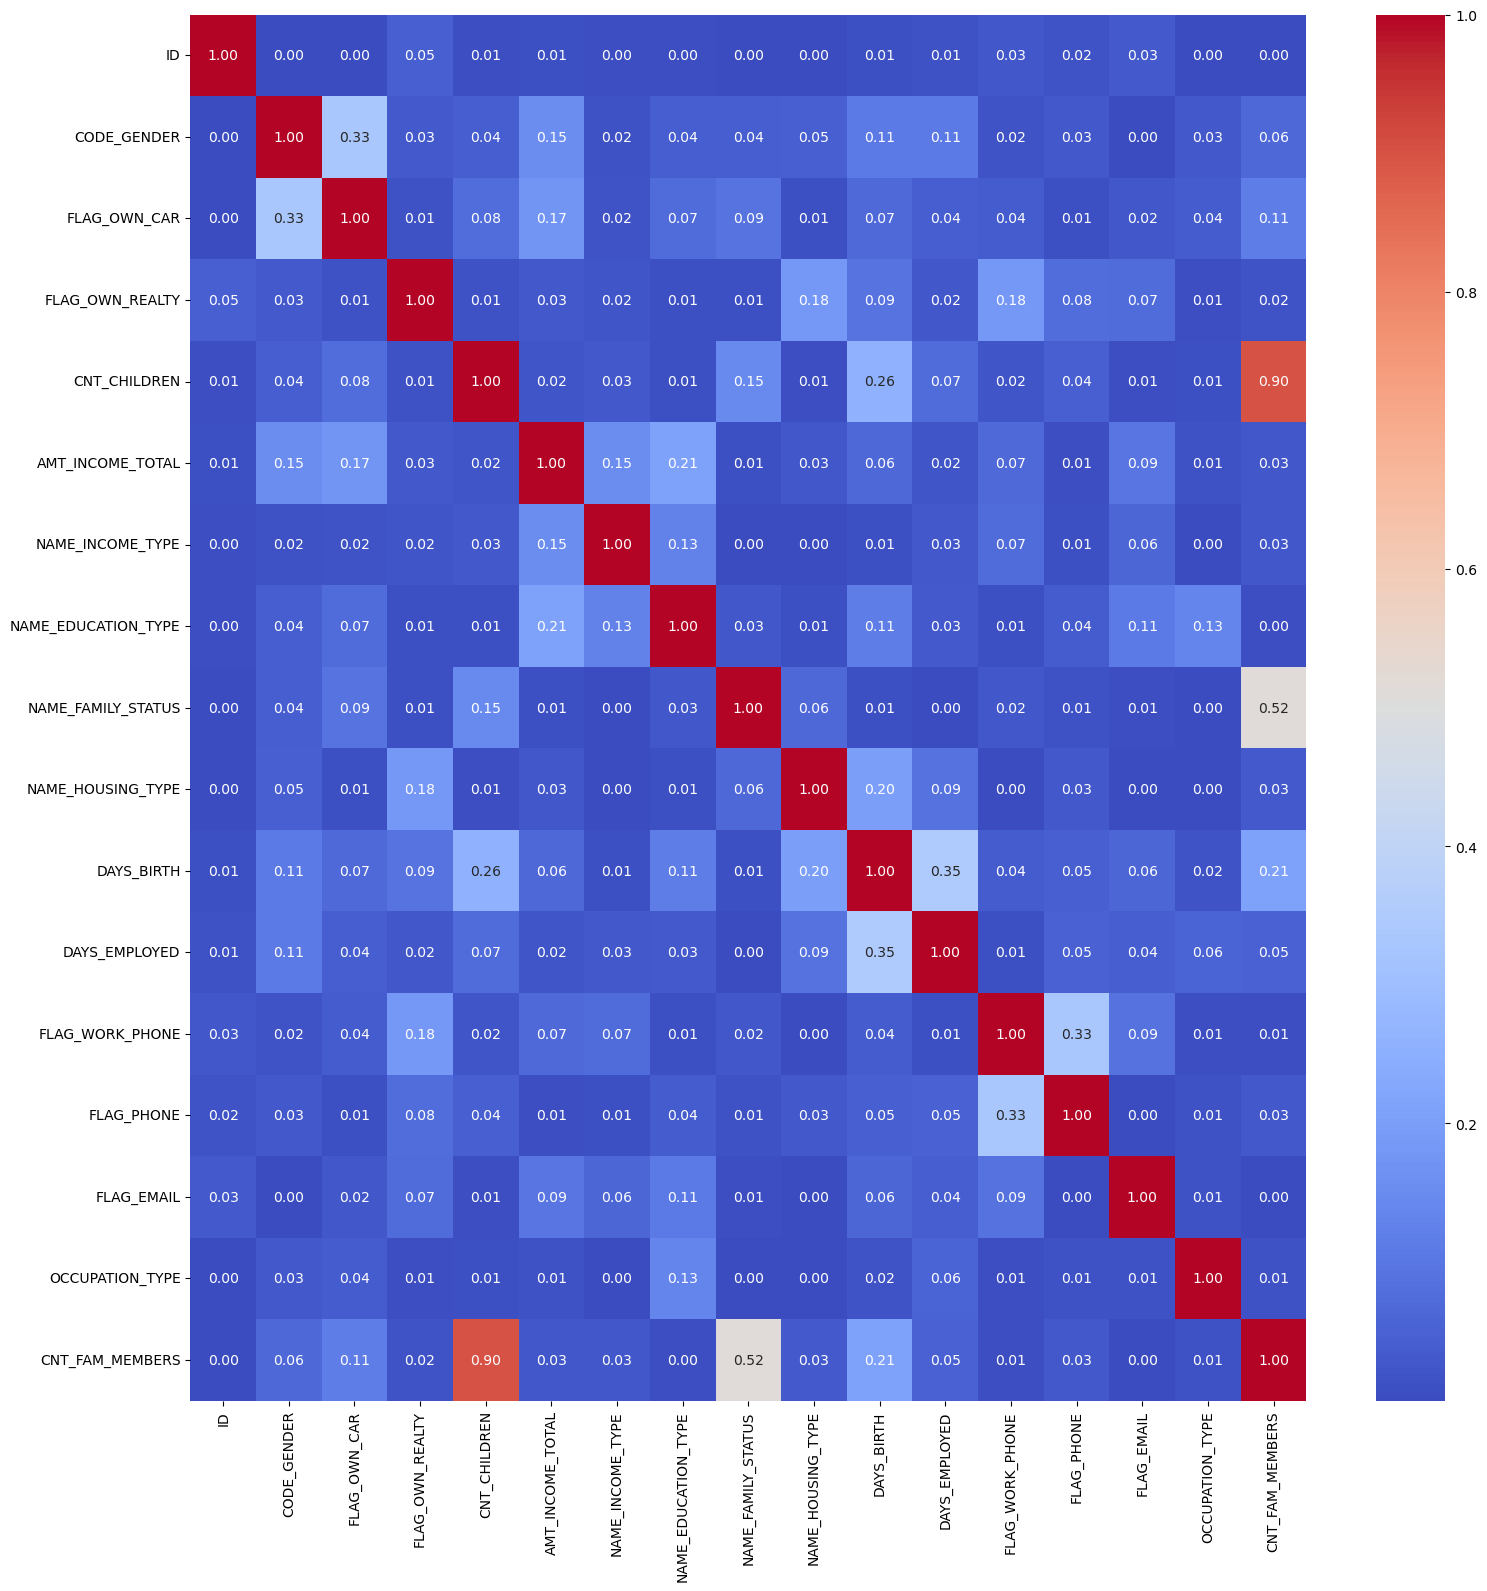

In [11]:
df_for_corr=application_record[application_record['OCCUPATION_TYPE'].notnull()==True]
le=LabelEncoder()
for col in df_for_corr.select_dtypes('object'):
    df_for_corr[col]=le.fit_transform(df_for_corr[col])

plt.figure(figsize=(18,18))
sns.heatmap(abs(df_for_corr.corr()), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [13]:
application_record.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.000000,1.000000,1.000000,20.000000


In [18]:
application_record.OCCUPATION_TYPE.value_counts()

Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

In [19]:
application_record['OCCUPATION_TYPE']=application_record['OCCUPATION_TYPE'].fillna('Sales staff')
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_WORK_PHONE      438557 non-null  int64  
 13  FLAG_PHONE           438557 non-null  int64  
 14  FLAG_EMAIL           438557 non-null  int64  
 15  OCCUPATION_TYPE  

In [15]:
application_record[application_record['CNT_CHILDREN']>5]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
20441,5061207,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,0,0,0,Drivers,15.0
20442,5061210,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,0,0,0,Drivers,15.0
20443,5061211,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,0,0,0,Drivers,15.0
36388,5105054,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,0,Waiters/barmen staff,20.0
42723,5118330,F,N,N,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,1,1,0,Cleaning staff,9.0
42724,5118331,F,N,N,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,1,1,0,Cleaning staff,9.0
79645,5307273,M,Y,N,9,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-14718,-5011,1,0,0,Drivers,11.0
79646,5307274,M,Y,N,9,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-14718,-5011,1,0,0,Drivers,11.0
79647,5372460,M,Y,N,9,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-14718,-5011,1,0,0,Drivers,11.0
79648,5372461,M,Y,N,9,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-14718,-5011,1,0,0,Drivers,11.0


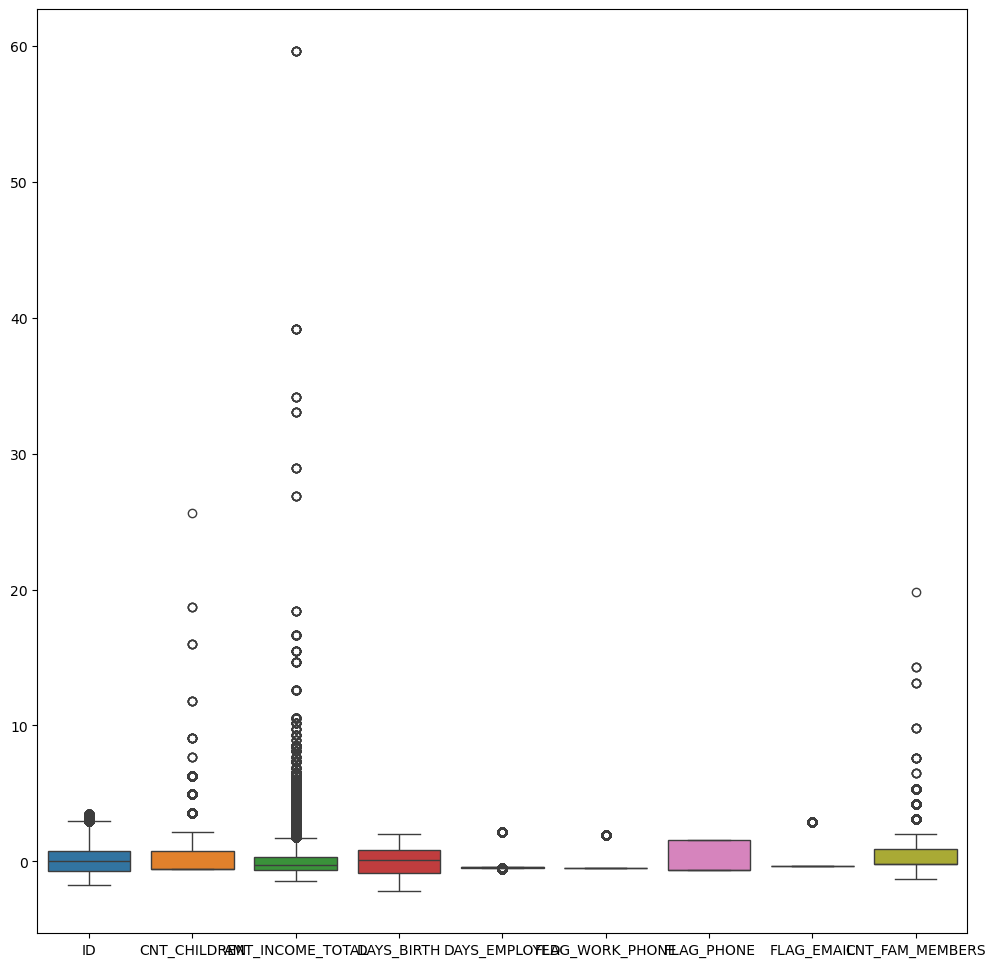

In [25]:
st=StandardScaler()
df_for_boxplot = pd.DataFrame(data=st.fit_transform(application_record.select_dtypes(['int', 'float'])), 
                              columns=application_record.select_dtypes(['int', 'float']).columns)
plt.figure(figsize=(12,12))
sns.boxplot(df_for_boxplot)
plt.show()

In [27]:
le=LabelEncoder()
application_record_orig=application_record.copy()
for col in application_record.select_dtypes('object').columns:
    application_record[col] = le.fit_transform(application_record[col])

iso = IsolationForest(contamination=0.1)
iso.fit(application_record)
predictions_of_vb = iso.predict(application_record)
application_record['emissions'] = predictions_of_vb

In [38]:
emissions=list(application_record[application_record.emissions==-1].index)
application_record.drop(emissions, inplace=True)
application_record.drop('CNT_CHILDREN', axis=1, inplace=True)

In [40]:
application_record.drop('emissions', axis=1, inplace=True)

In [44]:
for col in application_record_orig.select_dtypes('object'):
    le.fit(application_record_orig[col])
    application_record[col]=le.inverse_transform(application_record[col])
application_record.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2,5008806,M,Y,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0
3,5008808,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0


In [78]:
def label_encoding(data):
    le=LabelEncoder()
    orig_data = data.copy()
    for col in data.select_dtypes('object'):
        data[col] = le.fit_transform(data[col])
    return data, orig_data

def label_inverse_enc(data, orig_data):
    le=LabelEncoder()
    for col in orig_data.select_dtypes('object'):
        le.fit(orig_data[col])
        data[col] = le.inverse_transform(data[col])
    return data

In [46]:
for col in application_record.select_dtypes('object'):
    application_record[col] = le.fit_transform(application_record[col])

In [50]:
cluster = KMeans(n_clusters=2, n_init='auto', random_state=0)
cluster.fit(application_record)
target = cluster.predict(application_record)
application_record['target'] = target

In [60]:
for col in application_record_orig.select_dtypes('object'):
    le.fit(application_record_orig[col])
    application_record[col]=le.inverse_transform(application_record[col])
application_record.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
2,5008806,M,Y,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,1
3,5008808,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,1
4,5008809,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,1
5,5008810,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,1
6,5008811,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,1


In [93]:
application_record_enc, orig_applicat_rec = label_encoding(application_record)
X,y = application_record_enc.drop('target', axis=1), application_record_enc.target
pipeline = make_pipeline(
    RandomUnderSampler(random_state=42),
    ADASYN(random_state=42, n_jobs=-1)
)
X_res,y_res = pipeline.fit_resample(X,y)
final_df = pd.DataFrame(data=X_res, columns=X_res.columns)
final_df['Class']=y_res
print(f'Count of duplicated nums: {final_df.duplicated().sum()}')
print('Value counts after pipeline:')
final_df.Class.value_counts()

Count of duplicated nums: 0
Value counts after pipeline:


0    174071
1    174071
Name: Class, dtype: int64

In [98]:
def metrics(y_true, y_pred):
    print(f'Accuracy is : {accuracy_score(y_true,y_pred)}')
    print(f'F1 score is: {f1_score(y_test, y_pred)}')

    sns.heatmap(confusion_matrix(y_true,y_pred), annot=True, fmt='d', cmap='coolwarm')
    plt.show()

Accuracy is : 0.9999303663599886
F1 score is: 0.9999303633293292


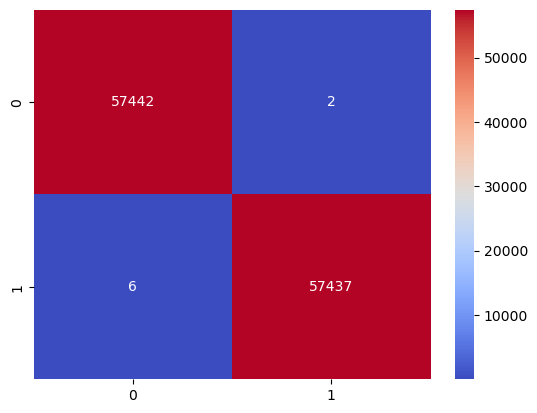

In [99]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop('Class', axis=1), final_df.Class,
                                                   test_size=0.33, stratify=final_df.Class, random_state=42)
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
pred=xgb.predict(X_test)
metrics(y_test,pred)

Learning rate set to 0.105681
0:	learn: 0.3579748	total: 67.8ms	remaining: 1m 7s
1:	learn: 0.1954633	total: 78.8ms	remaining: 39.3s
2:	learn: 0.1092948	total: 89.4ms	remaining: 29.7s
3:	learn: 0.0613003	total: 98.2ms	remaining: 24.5s
4:	learn: 0.0359835	total: 109ms	remaining: 21.6s
5:	learn: 0.0241894	total: 119ms	remaining: 19.7s
6:	learn: 0.0133306	total: 130ms	remaining: 18.4s
7:	learn: 0.0080465	total: 141ms	remaining: 17.5s
8:	learn: 0.0057665	total: 151ms	remaining: 16.6s
9:	learn: 0.0043285	total: 162ms	remaining: 16s
10:	learn: 0.0034893	total: 172ms	remaining: 15.4s
11:	learn: 0.0028954	total: 182ms	remaining: 15s
12:	learn: 0.0025244	total: 192ms	remaining: 14.6s
13:	learn: 0.0022605	total: 202ms	remaining: 14.3s
14:	learn: 0.0021071	total: 213ms	remaining: 14s
15:	learn: 0.0020184	total: 223ms	remaining: 13.7s
16:	learn: 0.0019367	total: 233ms	remaining: 13.5s
17:	learn: 0.0018743	total: 243ms	remaining: 13.2s
18:	learn: 0.0018743	total: 251ms	remaining: 12.9s
19:	learn: 0.

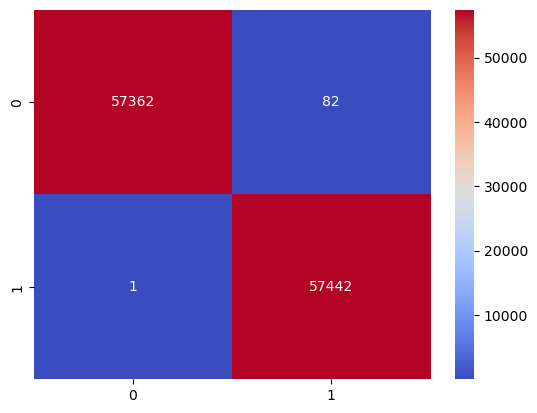

In [102]:
final_df_inverse = label_inverse_enc(final_df, orig_applicat_rec)
cat_feat = list(final_df_inverse.select_dtypes('object').columns)
cat_boost=CatBoostClassifier(cat_features=cat_feat)
cat_boost.fit(X_train,y_train)
pred_cat=cat_boost.predict(X_test)
metrics(y_test,pred_cat)